# Business understanding

Aircraft vary widely in their safety records depending on manufacturer, model, maintenance history, usage, and geography.While modern aircraft are statistically very safe, historical data shows that certain models and types have accidents rates often linked to operational environment, mechanical complexities or outdated systems. a good safety record of an airline is critical towards its operational market, survival, reputation, prestige and most importantly passengers confidence towards its service offered. 

The company being new to aircraft enterprise, lacks experience in aircraft risk assessment. its therefore important to determine which aircraft has lowest risks for the organization to makes decisions on which aircraft to purchase. 

## Business problem
The organization is expanding into the aviation industry and seeks to identify aircrafts with low-risks in order to proceed with purchase and starts its operations. the goal is to ensure safety and purchasing a reliable aircraft for commercial and private use.
### Objectives and business questions
1) To identify  the safest aircrafts make/models

2) To evaluate aircraft safety Risks based on purpose of flight

3) To analyze state operational risks 
 

## Metric of success
The success of the business depends on evidence-based recommendations on low risk aircraft before initial purchase. insights must be actionable, understandable to non-technical leadership and can be used in procurement process.




# .Data understanding 
The data to be used in this analysis is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

## Loading dataset and getting the information

In [3]:
# importing necessary libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
# reading and loading the dataset
aviation_data = pd.read_csv("data\AviationData.csv", encoding = "latin1")
aviation_data.head()

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
aviation_data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
aviation_data.sample(5, random_state= 4)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
38221,20001207X04511,Accident,LAX95FA321,1995-09-02,"PHOENIX, AZ",United States,NaN,NaN,DVT,PHOENIX DEER VALLEY MUNI,...,Personal,NaN,2.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,04-02-1997
33359,20001211X12901,Accident,DEN93LA088,1993-07-27,"MEEKER, CO",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,1.0,0.0,VMC,Maneuvering,Probable Cause,13-09-1994
65184,20080820X01268,Accident,CHI08WA258,2008-08-17,"Covington, United Kingdom",United Kingdom,NaN,NaN,NaN,NaN,...,Unknown,Reconnaissance Ventures Ltd,5.0,0.0,0.0,0.0,NaN,NaN,NaN,25-09-2020
82316,20180915X11112,Accident,WPR18LA262,2018-09-15,"St. Johns, AZ",United States,343049N,1092213W,SJN,St Johns Industrial Airport,...,Personal,NaN,0.0,0.0,3.0,0.0,VMC,NaN,The pilot's inadequate preflight planning befo...,25-09-2020
87501,20220307104735,Accident,ANC22LA022,2022-03-05,"Newhalen, AK",United States,593854N,0154597W,NaN,NaN,...,Business,SEND NORTH,0.0,1.0,4.0,0.0,IMC,NaN,The pilots decision to continue visual flight...,01-09-2022


In [7]:
# checking rows and columns shape
aviation_data.shape

(88889, 31)

The above dataset has a total of 88889 records and 31 features

In [8]:
# column names
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
# checking data info, dtypes and non null counts
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

From the above information, its clearly notable that the dataset has a total of 5 columns with numerical data types and
26 columns consisting of categorical data.some columns such as Event.Date have data type object instead of date time, most of the variables have null values only a few variables have no null values
that indicates that data needs to cleaned before analysis.

In [10]:
# checking for statistical info
aviation_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [11]:
# categorical info
aviation_data.describe(include= "O").head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001214X45071,Accident,DCA22LA201,2000-07-08,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


# Data preparation
## Data cleaning

In [12]:
# creating a copy of a data frame to be used in cleaning
aviation_cleaned_data = aviation_data.copy(deep= True)

In [13]:
# checking the Country column
aviation_cleaned_data['Country'].value_counts(dropna= False)

United States        82248
Brazil                 374
Canada                 359
Mexico                 358
United Kingdom         344
                     ...  
Anguilla                 1
Wallis and Futuna        1
Seychelles               1
Palau                    1
Yemen                    1
Name: Country, Length: 220, dtype: int64

Observation
from the above information, we see most of the data comes from the United States. so we will filter out the other
countries to remain with united states to be used in this analysis

In [14]:
# filtering dataset to include country USA
us_aviation_accidents_data= aviation_cleaned_data[aviation_cleaned_data['Country']== "United States"]
us_aviation_accidents_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [15]:
us_aviation_accidents_data = us_aviation_accidents_data.copy()

In [16]:
# checking for stat summary of numerical columns before filling in NaN values
us_aviation_accidents_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,80373.0,1.135481,0.427286,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,71594.0,0.421683,2.433647,0.0,0.0,0.0,0.0,265.0
Total.Serious.Injuries,70873.0,0.257178,1.144189,0.0,0.0,0.0,0.0,137.0
Total.Minor.Injuries,71519.0,0.332974,1.306604,0.0,0.0,0.0,0.0,125.0
Total.Uninjured,77243.0,4.302448,23.794728,0.0,0.0,1.0,2.0,699.0


In [17]:
# filling missing numerical injury columns with 0
injury_columns= ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
us_aviation_accidents_data[injury_columns] = us_aviation_accidents_data[injury_columns].fillna(0)

In [18]:
# checking null values
us_aviation_accidents_data[injury_columns].isna().sum()

Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

In [19]:
 # convert injury columns to numeric
for col in injury_columns:
    us_aviation_accidents_data[col]= pd.to_numeric(us_aviation_accidents_data[col], errors= "coerce")

Cleaning categorical columns

In [20]:
# clean categorical columns
categorical_columns= ['Aircraft.Category', 'Make', 'Model', 'Purpose.of.flight', 'Injury.Severity', 
                      'Aircraft.damage', 'Weather.Condition']

for col in us_aviation_accidents_data.columns:
    if us_aviation_accidents_data[col].dtype == "O":
        us_aviation_accidents_data[col] = us_aviation_accidents_data[col].str.strip().str.lower()

In [21]:
# checking categorical columns
us_aviation_accidents_data[categorical_columns].isna().sum()

Aircraft.Category    54094
Make                    21
Model                   38
Purpose.of.flight     2429
Injury.Severity        108
Aircraft.damage       1979
Weather.Condition      645
dtype: int64

In [22]:
# filling in Aircraft.Category 
us_aviation_accidents_data['Aircraft.Category'].value_counts(dropna= False)

NaN                  54094
airplane             24229
helicopter            2723
glider                 503
balloon                229
gyrocraft              172
weight-shift           161
powered parachute       90
ultralight              25
wsft                     9
blimp                    4
unknown                  4
powered-lift             3
ultr                     1
rocket                   1
Name: Aircraft.Category, dtype: int64

The above Column has 54094 misiing values and its notable that some values are abbreviation of others for instance
wsft is used instead of weight-shift and ultr inplace of ultralight

In [23]:
# creating a dic of category abbreviations
category_abb = {'wsft': 'weight-shift',
               'ultr': 'ultralight',
                'unk': 'unknown'}

In [24]:
# replacing abbreviations
us_aviation_accidents_data['Aircraft.Category'] = us_aviation_accidents_data['Aircraft.Category'].replace(category_abb)

In [25]:
# checking
us_aviation_accidents_data['Aircraft.Category'].value_counts()

airplane             24229
helicopter            2723
glider                 503
balloon                229
gyrocraft              172
weight-shift           170
powered parachute       90
ultralight              26
blimp                    4
unknown                  4
powered-lift             3
rocket                   1
Name: Aircraft.Category, dtype: int64

In [26]:
# filling in null values with unknown
us_aviation_accidents_data['Aircraft.Category']= us_aviation_accidents_data['Aircraft.Category'].fillna('unknown')

In [27]:
# checking
us_aviation_accidents_data['Aircraft.Category'].isna().sum()

0

In [28]:
# checking null values
# filling in make column

us_aviation_accidents_data['Make'].isna().sum()

21

In [29]:
# filling in missing values with unknown
us_aviation_accidents_data['Make']= us_aviation_accidents_data['Make'].fillna("unknown")

In [30]:
# checking
us_aviation_accidents_data['Make'].isna().sum()

0

In [31]:
# cleaning model column
us_aviation_accidents_data['Model'].isna().sum()

38

In [32]:
# checking value counts
us_aviation_accidents_data[['Model']].value_counts()

Model             
152                   2323
172                   1637
172n                  1136
pa-28-140              910
150                    790
                      ... 
lg2h                     1
libelle                  1
liberty xl               1
lighthizer special       1
&gcbc                    1
Length: 10786, dtype: int64

In [33]:
# filling in null values with unkown
us_aviation_accidents_data['Model']= us_aviation_accidents_data['Model'].fillna("unknown")

In [34]:
# cleaning purpose of flight column
us_aviation_accidents_data['Purpose.of.flight'].isna().sum()

2429

In [35]:
# checking for value counts
us_aviation_accidents_data['Purpose.of.flight'].value_counts().head()

personal              48544
instructional         10429
unknown                5739
aerial application     4627
business               3843
Name: Purpose.of.flight, dtype: int64

In [36]:
# filling in missing values with unknown
us_aviation_accidents_data['Purpose.of.flight']= us_aviation_accidents_data['Purpose.of.flight'].fillna('unknown')

In [37]:
# checking effectiveness
# us_aviation_accidents_data.info()

In [38]:
# cleaning Injury.Severity
us_aviation_accidents_data['Injury.Severity'].isna().sum()

108

In [39]:
us_aviation_accidents_data['Injury.Severity']= us_aviation_accidents_data['Injury.Severity'].fillna('unknown')

In [40]:
# cleaning location column
us_aviation_accidents_data['Location'].value_counts(dropna= True)

anchorage, ak       548
miami, fl           275
houston, tx         271
albuquerque, nm     265
chicago, il         256
                   ... 
natchez, la           1
silver creek, ne      1
sublette, il          1
fieldon, il           1
athens, ny            1
Name: Location, Length: 17588, dtype: int64

In [41]:
# extracting states from location
us_aviation_accidents_data['State']= aviation_cleaned_data['Location'].str.split(",").str[-1].str.strip()

In [42]:
# checking
us_aviation_accidents_data['State'].isna().sum()

11

In [43]:
# filling missing values with unknown
us_aviation_accidents_data['State']= us_aviation_accidents_data['State'].fillna("unknown")

In [44]:
# checking columns
# us_aviation_accidents_data.isna().sum()

In [45]:
# cleaning weather column
us_aviation_accidents_data['Weather.Condition'].value_counts()

vmc    75317
imc     5618
unk      668
Name: Weather.Condition, dtype: int64

In [46]:
# filling in missing values with unknown
us_aviation_accidents_data['Weather.Condition']= us_aviation_accidents_data['Weather.Condition'].fillna('unk')

Cleaning location column

In [47]:
# filling in missing values
us_aviation_accidents_data['Location']= us_aviation_accidents_data['Location'].fillna("unkown")

In [48]:
# checking for missing values
us_aviation_accidents_data['Location'].isna().sum()

0

In [49]:
# 
us_aviation_accidents_data= us_aviation_accidents_data.dropna(subset= ['Location'])

In [50]:
us_aviation_accidents_data['Location'].isna().sum()

0

## Data analysis



In [51]:
# plotting the top 5 aircraft make
top_make_counts= list(us_aviation_accidents_data['Make'].value_counts().head().index)
make_counts = list(us_aviation_accidents_data['Make'].value_counts().head())

In [52]:
top_make_counts

['cessna', 'piper', 'beech', 'bell', 'boeing']

In [53]:
make_counts

[25853, 14168, 5059, 2285, 1485]

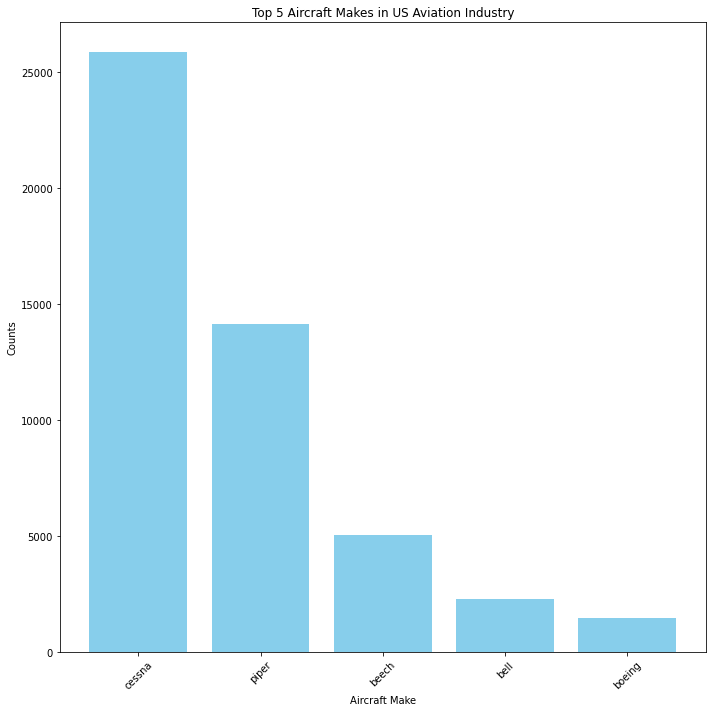

In [54]:
# plotting top_make counts
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(top_make_counts, make_counts, color='skyblue')
ax.set_title('Top 5 Aircraft Makes in US Aviation Industry')
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Counts')
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.tight_layout()
plt.show()

Cessna accounts for the largest number of accident records, followed by Piper and Beech. These three manufacturers 
are well-known for producing light general aviation aircraft, which are widely used for private flying, pilot training, 
and small-scale commercial operations. Their high representation likely reflects their large operational footprint in 
civilian aviation rather than disproportionately high accident rates.

Bell and Boeing, primarily known for helicopters and large commercial airliners respectively, appear less frequently. 
This distribution aligns with their more specialized roles and smaller share in general aviation activity compared to the 
light aircraft segment.

In [55]:
# Top Model counts 
top_model_counts= list(us_aviation_accidents_data['Model'].value_counts().head().index)
model_counts = list(us_aviation_accidents_data['Model'].value_counts().head())

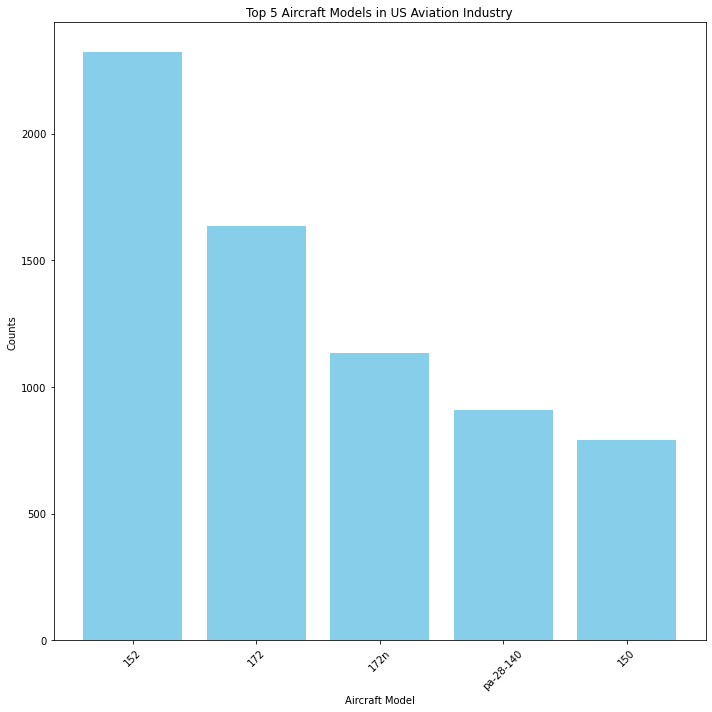

In [56]:
# plotting the top 5 model 
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(top_model_counts, model_counts, color='skyblue')
ax.set_title('Top 5 Aircraft Models in US Aviation Industry')
ax.set_xlabel('Aircraft Model')
ax.set_ylabel('Counts')
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.tight_layout()
plt.show()

Observation

Cessna 152, 172, 172n and 150 are among the most commonly used models in aviation. cessna 152 has highest number of 
accidents records in this dataset, followed by cessna 172, 172n and 150. pa-28-140(PA-28-140) is model from Piper 
make.

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


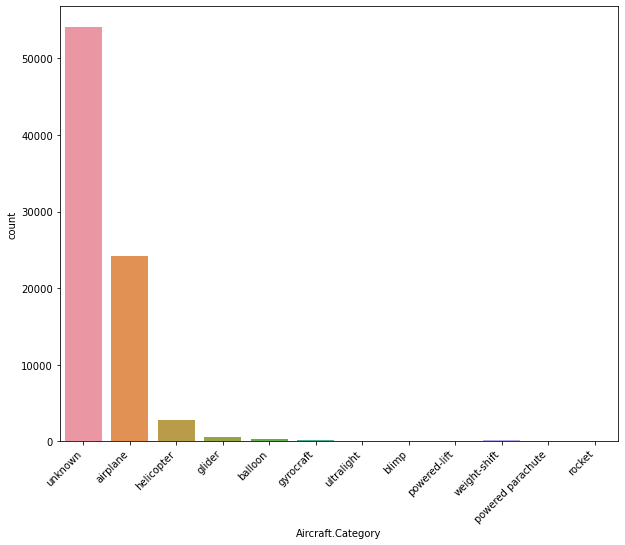

In [57]:
# plotting count plot of aircraft category
plt.figure(figsize=(10, 8))
sns.countplot(us_aviation_accidents_data['Aircraft.Category'])

plt.xticks(rotation=45, ha="right")

plt.show()

In [58]:
# creating a list of top 5 aircraft category and counts
top_aircraft_category = list(us_aviation_accidents_data['Aircraft.Category'].value_counts().head().index)
top_aircraft_counts = list(us_aviation_accidents_data['Aircraft.Category'].value_counts().head())

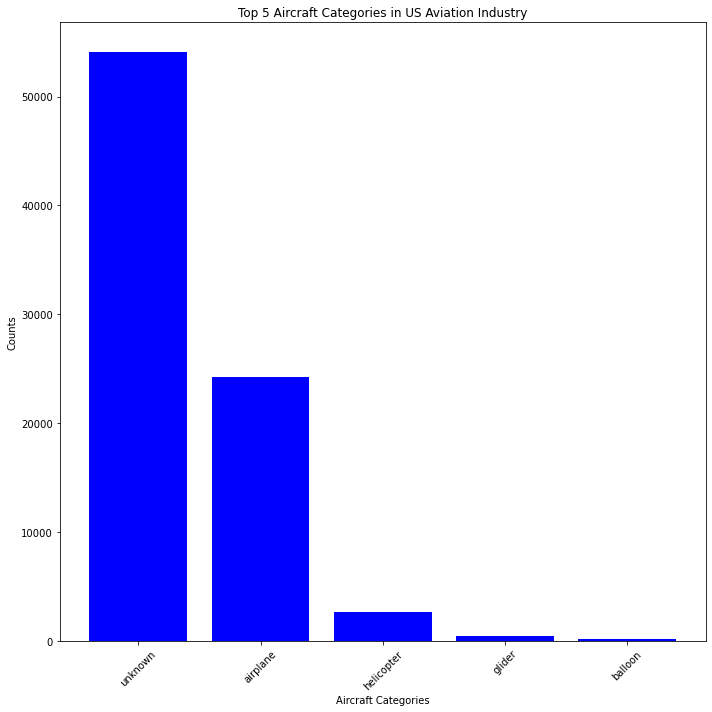

In [59]:
# plotting top aircraft categories used in Aviation
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(top_aircraft_category, top_aircraft_counts, color='blue')
ax.set_title('Top 5 Aircraft Categories in US Aviation Industry')
ax.set_xlabel('Aircraft Categories')
ax.set_ylabel('Counts')
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.tight_layout()
plt.show()

Observation

from the data above, The "Unknown" category accounts for the highest number of entries, suggesting a significant
proportion of records either lacked complete information or were not properly categorized during reporting. 
While this limits definitive conclusions, it underscores the importance of accurate data entry in aviation safety analysis.

Among the identifiable categories, airplanes dominate, which aligns with their widespread use in both commercial and
general aviation. Helicopters, gliders, and balloons appear less frequently, likely reflecting their lower operational 
volume.


In [60]:
# purpose of flight counts in aviation accidents data
purpose_counts= aviation_cleaned_data['Purpose.of.flight'].value_counts().head()

In [61]:
purpose_counts

Personal              49448
Instructional         10601
Unknown                6802
Aerial Application     4712
Business               4018
Name: Purpose.of.flight, dtype: int64

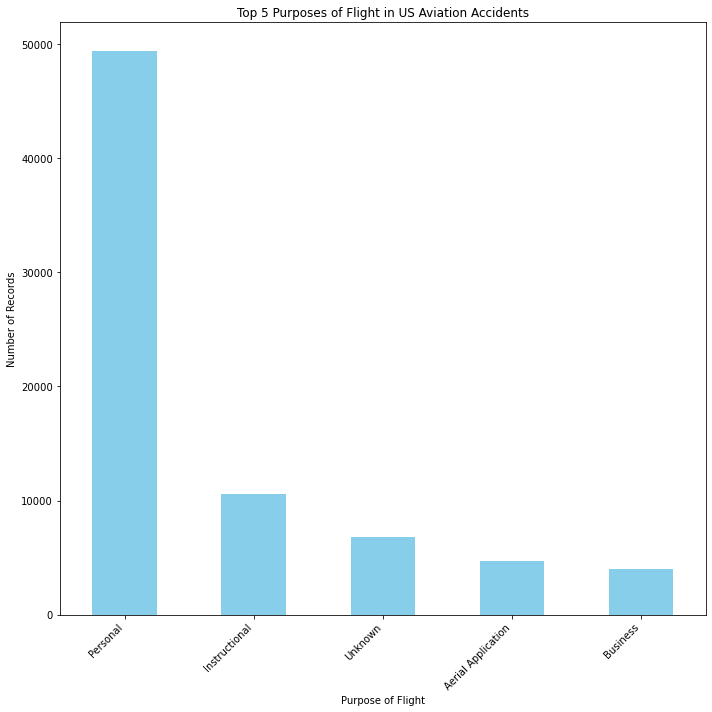

In [62]:
# plotting a count plot of purpose of flight variable
plt.figure(figsize=(10, 10))
purpose_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Purposes of Flight in US Aviation Accidents')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

observation

Personal category dominates in accidents records, accounting to nearly five times the second category. instructional
is flight training, represents the second largest group, this in most cases used in training new pilot students.
unknown suggests that flight purposes is not known while during data collection, which should be improved. Flight for 
Aerial Application and business purposes have less accidents records.

In [63]:
# correlation between accidents and aircraft category
accident_by_category= (us_aviation_accidents_data['Aircraft.Category'].value_counts().sort_values(ascending= False))


Analyzing Risks

In [64]:
# calculating total incidents and fatalities per make model
model_stats= us_aviation_accidents_data.groupby(["Make", "Model"]).agg({'Event.Id': 'count',
                                                       'Total.Fatal.Injuries':'sum',
                                                       'Total.Serious.Injuries': 'sum',
                                                       'Total.Minor.Injuries': 'sum',
                                                       'Total.Uninjured': 'sum',
                                                       })

In [65]:
# calculating total people involved
model_stats["Total People"]= (model_stats['Total.Fatal.Injuries'] + 
                             model_stats['Total.Serious.Injuries'] +
                             model_stats['Total.Minor.Injuries'] +
                             model_stats['Total.Uninjured'] )

In [66]:
# calculating safety metrics (risk factor)
model_stats['Fatality Rate']= model_stats['Total.Fatal.Injuries'] / model_stats['Total People']


In [67]:
model_stats['Injury Rates']= (model_stats['Total.Fatal.Injuries'] + model_stats['Total.Serious.Injuries'] + 
                              model_stats['Total.Minor.Injuries'])/ model_stats["Total People"]
                              

In [68]:
model_stats

,,Event.Id,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total People,Fatality Rate,Injury Rates
Make,Model,,,,,,,,
1200,g103,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
177mf llc,pitts model 12,1,0.0,2.0,0.0,0.0,2.0,0.0,1.0
1977 colfer-chan,steen skybolt,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1st ftr gp,focke-wulf 190,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2000 mccoy,genesis,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
zubair s khan,raven,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0
zuber thomas p,zuber super drifter,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
zukowski,eaa biplane,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [69]:
# filtering model with minimum number of incidents
# model_stats.sort_values(by='Fatality Rate', ascending= False).index

In [70]:
# resetting columns
plot_df= model_stats.sort_values(by='Fatality Rate', ascending= False).reset_index()
# creating a combined label for plotting
plot_df['make_model'] = plot_df['Make'] + ' ' + plot_df['Model']

In [71]:
top_make_model_stat_sorted= plot_df[plot_df['Event.Id'] > 5].head(10)

In [72]:
top_make_model_stat_sorted

,Make,Model,Event.Id,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total People,Fatality Rate,Injury Rates,make_model
2738,piper,pa-31t2,6,16.0,0.0,0.0,1.0,17.0,0.941176,0.941176,piper pa-31t2
2768,beech,h18,8,17.0,0.0,2.0,3.0,22.0,0.772727,0.863636,beech h18
2771,beech,c-90,7,12.0,0.0,0.0,4.0,16.0,0.750000,0.750000,beech c-90
2805,cessna,310h,13,23.0,3.0,2.0,5.0,33.0,0.696970,0.848485,cessna 310h
2807,beech,b95a,6,9.0,0.0,4.0,0.0,13.0,0.692308,1.000000,beech b95a
2808,cessna,320d,16,31.0,1.0,1.0,12.0,45.0,0.688889,0.733333,cessna 320d
2810,mitsubishi,mu-2b-60,31,61.0,8.0,2.0,18.0,89.0,0.685393,0.797753,mitsubishi mu-2b-60
2811,beech,95 b55 (t42a),7,13.0,0.0,0.0,6.0,19.0,0.684211,0.684211,beech 95 b55 (t42a)
2847,air command,532,6,4.0,1.0,0.0,1.0,6.0,0.666667,0.833333,air command 532
2922,rockwell,112,8,8.0,1.0,1.0,2.0,12.0,0.666667,0.833333,rockwell 112


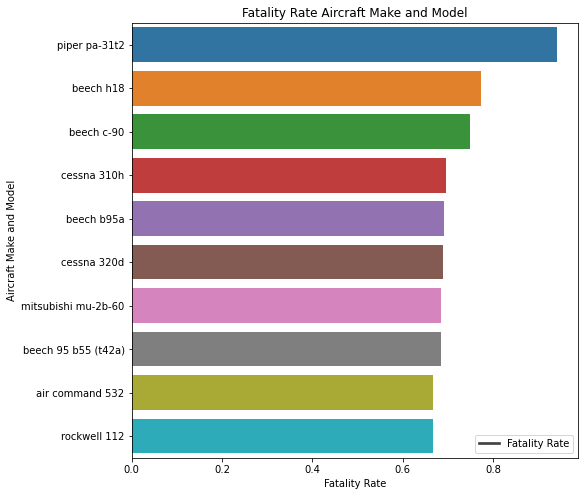

In [73]:
# plotting
plt.figure(figsize=(8, 8))
sns.barplot(x= 'Fatality Rate',
           y= 'make_model',
           data= top_make_model_stat_sorted)
plt.title("Fatality Rate Aircraft Make and Model")
plt.xlabel('Fatality Rate')
plt.ylabel('Aircraft Make and Model')
plt.legend(labels=['Fatality Rate'], loc='lower right')
palete= "set2"
plt.show()

Observation

The above bar plot shows the top 10 aircraft make/model  sorted using fatality rate according to the number of incident or accident occurence. and from that we can deduce that Piper PA-31T2 make model has the highest fatality rate, followed by BEECH H18 make model with 80% fatality rates, models like CESSNA 310H, BEECH B95A, CESSNA 320D, MITSUBISHI MU-2B-60 have moderate fatality and make model Air Command 532 and Rockell 112 Have the lowest fatality risks.



In [74]:
# grouping by purpose of fight
purpose_stats = us_aviation_accidents_data.groupby("Purpose.of.flight").agg({'Event.Id': 'count',
                                                       'Total.Fatal.Injuries':'sum',
                                                       'Total.Serious.Injuries': 'sum',
                                                       'Total.Minor.Injuries': 'sum',
                                                       'Total.Uninjured': 'sum',
                                                       })

In [75]:
purpose_stats

,Event.Id,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Purpose.of.flight,,,,,
aerial application,4627,493.0,585.0,781.0,2925.0
aerial observation,707,291.0,287.0,296.0,845.0
air drop,8,1.0,4.0,0.0,10.0
air race show,82,27.0,14.0,18.0,63.0
air race/show,57,30.0,21.0,10.0,38.0
asho,6,14.0,1.0,0.0,1.0
banner tow,101,19.0,31.0,10.0,52.0
business,3843,2006.0,824.0,1052.0,6280.0
executive/corporate,509,384.0,119.0,177.0,1523.0


In [76]:
# calculating total people
purpose_stats["Total People"]= (purpose_stats['Total.Fatal.Injuries'] + 
                             purpose_stats['Total.Serious.Injuries'] +
                             purpose_stats['Total.Minor.Injuries'] +
                             purpose_stats['Total.Uninjured'] )

In [77]:
# calculating fatality rate
purpose_stats['Fatality Rate']= purpose_stats['Total.Fatal.Injuries'] / purpose_stats['Total People']

In [78]:
# injury rate
purpose_stats['Injury Rates']= (purpose_stats['Total.Fatal.Injuries'] + purpose_stats['Total.Serious.Injuries'] + 
                              purpose_stats['Total.Minor.Injuries'])/ purpose_stats["Total People"]

In [79]:
purpose_stats.sort_values(by= 'Fatality Rate')

,Event.Id,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total People,Fatality Rate,Injury Rates
Purpose.of.flight,,,,,,,,
pubs,4,0.0,0.0,2.0,5.0,7.0,0.000000,0.285714
publ,1,0.0,0.0,0.0,2.0,2.0,0.000000,0.000000
unknown,8168,5886.0,3225.0,5215.0,249548.0,263874.0,0.022306,0.054291
air drop,8,1.0,4.0,0.0,10.0,15.0,0.066667,0.333333
public aircraft - local,74,13.0,49.0,19.0,96.0,177.0,0.073446,0.457627
instructional,10429,1693.0,1512.0,2031.0,12480.0,17716.0,0.095563,0.295552
public aircraft - federal,98,33.0,20.0,27.0,245.0,325.0,0.101538,0.246154
aerial application,4627,493.0,585.0,781.0,2925.0,4784.0,0.103052,0.388587
other work use,1192,374.0,376.0,526.0,1604.0,2880.0,0.129861,0.443056


In [80]:
purpose_stats= purpose_stats.sort_values(by='Fatality Rate', ascending= False).reset_index()

In [81]:
top_purpose_stats= purpose_stats[purpose_stats["Event.Id"] > 100].head(10)

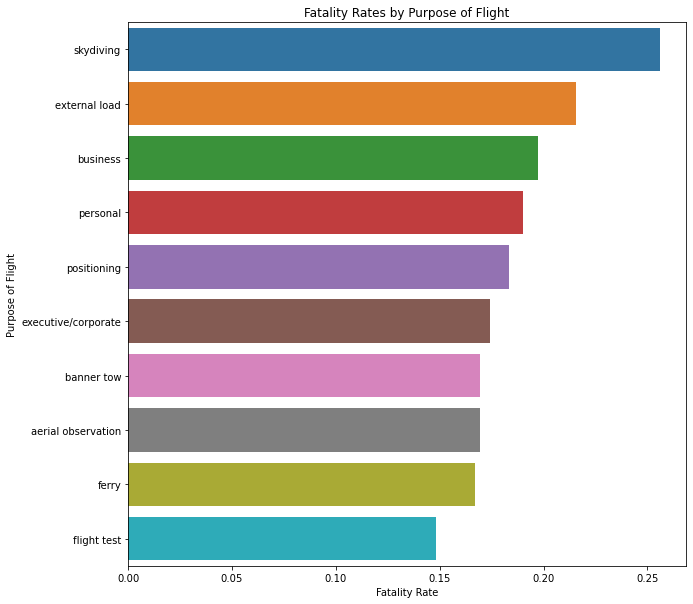

In [95]:
# plotting
plt.figure(figsize=(10, 10))
sns.barplot(x= 'Fatality Rate',
           y= 'Purpose.of.flight',
           data= top_purpose_stats)
plt.title('Fatality Rates by Purpose of Flight')
plt.xlabel('Fatality Rate')
plt.ylabel('Purpose of Flight')
plt.show()

plt.show()

Observation

After selecting the activities by event counts of more than 100, purpose of flight with the highest fatality rate is Air sky diving with fatality rate of about 25%, extra load and business purpose follows. 

The activities with moderate risks are personal, positioning and executive corporate of less 20%

the flight purpose with lowest fatality rate is flight test with fatality rate of 17% probably because it is an activity with instructions

<AxesSubplot:xlabel='Total People', ylabel='Fatality Rate'>

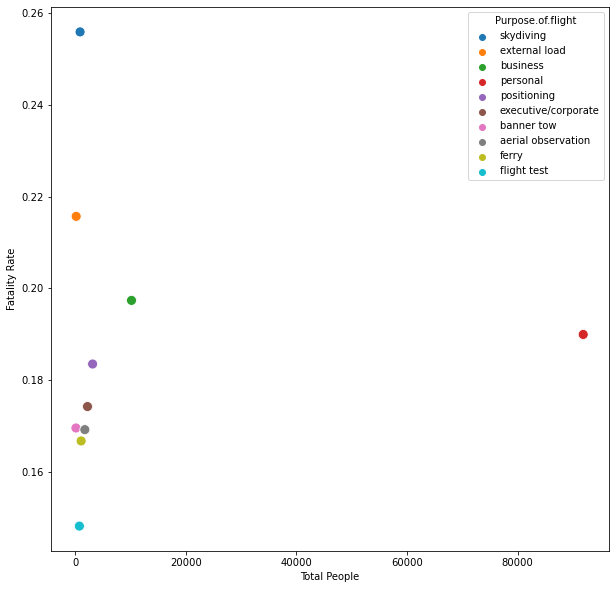

In [83]:
# scatter plot showing total number of people, fatality rate per flight purpose 
plt.figure(figsize=(10, 10))
sns.scatterplot(data= top_purpose_stats, x='Total People', y='Fatality Rate', hue= "Purpose.of.flight", alpha=1.0, s= 100)

In [84]:
# analyzing risk by state
states_stats= us_aviation_accidents_data.groupby("State").agg({'Event.Id': 'count',
                                                       'Total.Fatal.Injuries':'sum',
                                                       'Total.Serious.Injuries': 'sum',
                                                       'Total.Minor.Injuries': 'sum',
                                                       'Total.Uninjured': 'sum',
                                                       }).rename(columns={'Event.Id': 'Incident Count'})

In [85]:
# calculating total people
states_stats["Total People"]= (states_stats['Total.Fatal.Injuries'] + 
                             states_stats['Total.Serious.Injuries'] +
                             states_stats['Total.Minor.Injuries'] +
                             states_stats['Total.Uninjured'] )

In [86]:
# calculating risk factor per state
states_stats['Fatality Rate']= states_stats['Total.Fatal.Injuries'] / states_stats['Total People']

In [87]:
states_stats= states_stats= states_stats.sort_values(by='Fatality Rate', ascending= False).reset_index()

In [88]:
top_states = states_stats[states_stats['Incident Count'] >= 5].head(15)

In [89]:
top_states

,State,Incident Count,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total People,Fatality Rate
1,unknown,11,19.0,1.0,0.0,13.0,33.0,0.575758
2,GU,8,233.0,26.0,7.0,456.0,722.0,0.322715
3,AL,1153,475.0,239.0,259.0,1657.0,2630.0,0.180608
4,OK,1240,494.0,300.0,337.0,1748.0,2879.0,0.171587
5,GM,44,21.0,12.0,22.0,69.0,124.0,0.169355
6,DE,114,43.0,22.0,35.0,170.0,270.0,0.159259
7,MS,813,248.0,148.0,213.0,1005.0,1614.0,0.153656
8,MT,1050,363.0,186.0,215.0,1729.0,2493.0,0.145608
9,AR,1519,470.0,324.0,398.0,2043.0,3235.0,0.145286
10,ID,1436,468.0,289.0,299.0,2232.0,3288.0,0.142336


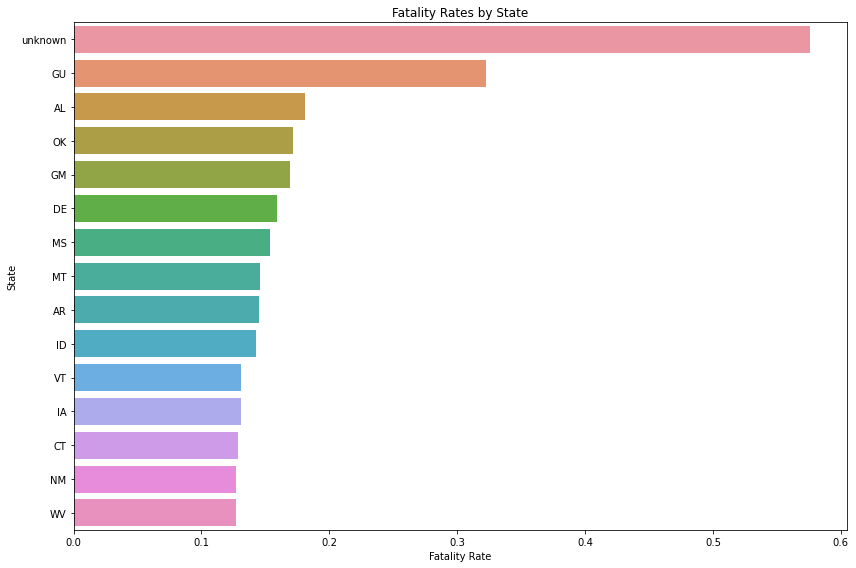

In [90]:
# plotting
plt.figure(figsize=(12, 8))
sns.barplot(x= "Fatality Rate", y= 'State', data= top_states)

plt.title('Fatality Rates by State')
plt.xlabel('Fatality Rate')
plt.ylabel('State')
plt.tight_layout()
palette= "Reds r"



The bar at the top indicates the state with the highest fatality rate, and in this case those states are unknown probably 
because the states records were not recorded during incident or accident occurrence.

The top state with higher fatality rate then the rest is Guam, it is a USA state territory and its leading in fatality rates.

The middle states like Arizona have moderate fatality rates as compared to the ones at the top.
Connecticut, New Mexico, West Virginia have less than 15%  fatality  rate which makes it ideal for  aviation operations.

In [91]:
us_code_data= pd.read_csv("data/USState_Codes.csv", encoding= "latin1")

In [92]:
us_aviation_accidents_data = us_aviation_accidents_data.merge(us_code_data, how='left', 
                                                              left_on='State',       # column in aviation data
                                                              right_on='Abbreviation'  # column in state code data
)

In [93]:
us_aviation_accidents_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State,US_State,Abbreviation
0,20001218x45444,accident,sea87la080,1948-10-24,"moose creek, id",united states,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,unk,cruise,probable cause,NaN,ID,Idaho,ID
1,20001218x45447,accident,lax94la336,1962-07-19,"bridgeport, ca",united states,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,unk,unknown,probable cause,19-09-1996,CA,California,CA
2,20061025x01555,accident,nyc07la005,1974-08-30,"saltville, va",united states,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,imc,cruise,probable cause,26-02-2007,VA,Virginia,VA
3,20001218x45448,accident,lax96la321,1977-06-19,"eureka, ca",united states,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,imc,cruise,probable cause,12-09-2000,CA,California,CA
4,20041105x01764,accident,chi79fa064,1979-08-02,"canton, oh",united states,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,vmc,approach,probable cause,16-04-1980,OH,Ohio,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82243,20221227106491,accident,era23la093,2022-12-26,"annapolis, md",united states,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,unk,NaN,NaN,29-12-2022,MD,Maryland,MD
82244,20221227106494,accident,era23la095,2022-12-26,"hampton, nh",united states,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,unk,NaN,NaN,NaN,NH,New Hampshire,NH
82245,20221227106497,accident,wpr23la075,2022-12-26,"payson, az",united states,341525n,1112021w,pan,payson,...,0.0,0.0,1.0,vmc,NaN,NaN,27-12-2022,AZ,Arizona,AZ
82246,20221227106498,accident,wpr23la076,2022-12-26,"morgan, ut",united states,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,unk,NaN,NaN,NaN,UT,Utah,UT


In [94]:
# saving csv file
us_aviation_accidents_data.to_csv("us_aviation_accidents_data", index= False)

# Conclusion


Based on the above analysis:
1) make/model safe are Air Command 532 and Rockell 112  and models like CESSNA 310H, BEECH B95A, CESSNA 320D, MITSUBISHI MU-2B-60 have moderate fatality rates. Air Command 532 and Rockell 112 are safe aircrafts models for private and commercial business.

2) Upon Evaluation of risks associated with the purpose of flight, sky diving emerged as the activity with highest fatality rate, this activity should be therefore be avoided when the company ventures into the new aviation business. the activity with the lowest fatality rate is flight test, this is so because of the instructions and guidelines in place while doing it. 

3) On states operational risks, states with high fatality rates are unknown, this requires improvement on data collection when the incidents occur to inform in decision making
